In [1]:
options(warn = -1)

In [2]:
library(readxl)
library(lubridate)
library(rgdal)
library(RColorBrewer)
library(classInt)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Loading required package: sp

rgdal: version: 1.5-23, (SVN revision 1121)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.2.1, released 2020/12/29
Path to GDAL shared files: C:/Users/clid1852/Documents/R/win-library/4.0/rgdal/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.2.1, January 1st, 2021, [PJ_VERSION: 721]
Path to PROJ shared files: C:/Users/clid1852/Documents/R/win-library/4.0/rgdal/proj
PROJ CDN enabled: TRUE
Linking to sp version:1.4-5
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.
Overwritten PROJ_LIB was C:/Users/clid1852/Documents/R/win-library/4.0/rgdal/proj



In [3]:
inpath <- 'T:/Data/COUNTS/Nonmotorized Counts/Summary Tables/Bicycle/'

In [4]:
data <- read.csv(paste0(inpath, 'Bicycle_HourlyForTableau.csv'))

In [5]:
head(data)

,Direction,ObsHours,Location,LocationId,Day,Month,MonthDesc,Year,Date,Season,⋯,Period,DailyCounts,IsOneway,OnewayDirection,IsSidewalk,UoInSession,IsSpecialEvent,UniqueId,Hour,Hourly_Count
,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<lgl>,<chr>,<lgl>,<int>,<int>,<chr>,<chr>,<int>
1,Total,9,10thWestJackson,104,19,7,July,2013,2013-07-19,Summer,⋯,07.19.2013-07.29.2013,NA,FALSE,NA,FALSE,0,0,Total-10thWestJackson-07-19-2013,0:00,NA
2,East,9,10thWestJackson,104,19,7,July,2013,2013-07-19,Summer,⋯,07.19.2013-07.29.2013,NA,FALSE,NA,FALSE,0,0,East-10thWestJackson-07-19-2013,0:00,NA
3,West,9,10thWestJackson,104,19,7,July,2013,2013-07-19,Summer,⋯,07.19.2013-07.29.2013,NA,FALSE,NA,FALSE,0,0,West-10thWestJackson-07-19-2013,0:00,NA
4,Total,24,10thWestJackson,104,20,7,July,2013,2013-07-20,Summer,⋯,07.19.2013-07.29.2013,147,FALSE,NA,FALSE,0,0,Total-10thWestJackson-07-20-2013,0:00,5
5,East,24,10thWestJackson,104,20,7,July,2013,2013-07-20,Summer,⋯,07.19.2013-07.29.2013,69,FALSE,NA,FALSE,0,0,East-10thWestJackson-07-20-2013,0:00,1
6,West,24,10thWestJackson,104,20,7,July,2013,2013-07-20,Summer,⋯,07.19.2013-07.29.2013,78,FALSE,NA,FALSE,0,0,West-10thWestJackson-07-20-2013,0:00,4


In [6]:
names(data)

[1] "Direction"       "ObsHours"        "Location"        "LocationId"     
 [5] "Day"             "Month"           "MonthDesc"       "Year"           
 [9] "Date"            "Season"          "Weekday"         "IsHoliday"      
[13] "Period"          "DailyCounts"     "IsOneway"        "OnewayDirection"
[17] "IsSidewalk"      "UoInSession"     "IsSpecialEvent"  "UniqueId"       
[21] "Hour"            "Hourly_Count"

In [6]:
data$Date <- as.Date(data$Date, "%Y-%m-%d")

In [7]:
sort(unique(year(data$Date)))

[1] 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021

In [8]:
range(data$Date)

[1] "2012-06-21" "2021-12-31"

In [9]:
locdata <- read.csv("T:/Data/COUNTS/Nonmotorized Counts/Supporting Data/Supporting Bicycle Data/CountLocationInformation.csv")

In [10]:
head(locdata)

,LocationId,CountType,Direction,FacilityType,ArrowAngle,RoadWidth,IsAutomatic,Location,HasData,City,⋯,IsOneway,OnewayDirection,IsSidewalk,Latitude,Longitude,ImageFilePath,Site_Name,Location_Description,TAZ,Visual
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<lgl>,<chr>,<lgl>,<chr>,⋯,<lgl>,<chr>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<lgl>
1,171,Manual,NS,Lane,90,36,FALSE,EastAmazonSouth39th,TRUE,Eugene,⋯,FALSE,<Null>,FALSE,44.01259,-123.0768,\\clsrv111\transpor\Data\COUNTS\Nonmotorized Counts\Supporting Data\Supporting Bicycle Data\CountLocationPictures\EastAmazonSouth39th\EastAmazonSouth39th.jpg,E Amazon Dr south of 39th Ave,"E Amazon Dr, 140ft south of 39th Ave, Eugene",441,TRUE
2,172,Manual,NS,NoFacility,90,34,FALSE,KincaidSouth37th,TRUE,Eugene,⋯,FALSE,<Null>,FALSE,44.01526,-123.0761,\\clsrv111\transpor\Data\COUNTS\Nonmotorized Counts\Supporting Data\Supporting Bicycle Data\CountLocationPictures\KincaidSouth37th\KincaidSouth37th.jpg,Kincaid St south of 37th Ave,"Kincaid St, 250ft south of 37th Ave, Eugene",441,TRUE
3,175,Manual,NS,Path,90,14,FALSE,HilyardSouth33rdWestSidewalk,TRUE,Eugene,⋯,FALSE,<Null>,FALSE,44.02028,-123.0817,\\clsrv111\transpor\Data\COUNTS\Nonmotorized Counts\Supporting Data\Supporting Bicycle Data\CountLocationPictures\HilyardSouth33rdWestSidewalk\HilyardSouth33rdWestSidewalk.jpg,Hilyard St west Sidewalk south of 33rd Ave,"Hilyard St west Sidewalk, 250ft south of 33rd Ave, Eugene",417,TRUE
4,174,Manual,NS,Path,90,8,FALSE,HilyardSouth33rdEastSidewalk,TRUE,Eugene,⋯,FALSE,<Null>,FALSE,44.02038,-123.0814,\\clsrv111\transpor\Data\COUNTS\Nonmotorized Counts\Supporting Data\Supporting Bicycle Data\CountLocationPictures\HilyardSouth33rdEastSidewalk\HilyardSouth33rdEastSidewalk.jpg,Hilyard St east Sidewalk south of 33rd Ave,"Hilyard St east Sidewalk, 220ft south of 33rd Ave, Eugene",418,TRUE
5,198,Manual,NS,Path,90,12,FALSE,EastAmazonEastHilyardWestSidewalk,TRUE,Eugene,⋯,FALSE,<Null>,FALSE,44.02051,-123.0810,\\clsrv111\transpor\Data\COUNTS\Nonmotorized Counts\Supporting Data\Supporting Bicycle Data\CountLocationPictures\EastAmazonEastHilyardWestSW\EastAmazonEastHilyardWestSW.jpg,E Amazon Dr east of Hilyard St,"E Amazon Dr west Sidewalk, 250ft east of Hilyard St, Eugene",442,TRUE
6,173,Manual,NS,Lane,90,36,FALSE,EastAmazonEastHilyard,TRUE,Eugene,⋯,FALSE,<Null>,FALSE,44.02054,-123.0809,\\clsrv111\transpor\Data\COUNTS\Nonmotorized Counts\Supporting Data\Supporting Bicycle Data\CountLocationPictures\EastAmazonEastHilyard\EastAmazonEastHilyard.jpg,E Amazon Dr east of Hilyard St,"E Amazon Dr, 240ft east of Hilyard St, Eugene",442,TRUE


In [11]:
names(locdata)

[1] "LocationId"           "CountType"            "Direction"           
 [4] "FacilityType"         "ArrowAngle"           "RoadWidth"           
 [7] "IsAutomatic"          "Location"             "HasData"             
[10] "City"                 "DoubleCountLocation"  "IsOneway"            
[13] "OnewayDirection"      "IsSidewalk"           "Latitude"            
[16] "Longitude"            "ImageFilePath"        "Site_Name"           
[19] "Location_Description" "TAZ"                  "Visual"

In [12]:
# the number of site name
length(unique(locdata$Site_Name))

[1] 202

In [13]:
# remove the site names with direction info
loc1 <- locdata[!grepl('EB|WB|SB|NB', locdata$Site_Name),]

In [14]:
length(unique(loc1$Site_Name)) == length(unique(loc1$LocationId))

[1] FALSE

In [15]:
# these location IDs are duplicated
ids <- unique(loc1$LocationId[duplicated(loc1$LocationId)])

In [16]:
for(id in ids){
    print(id)
    print(unique(loc1[loc1$LocationId == id, 'Site_Name']))
}

[1] 182
[1] "Crescent Ave East of Lord Byron Pl"


In [17]:
# duplicated Ids with the same site name
loc1$Site_Name[duplicated(loc1$Site_Name)]
loc1[duplicated(loc1$Site_Name), 'LocationId']

[1] "E Amazon Dr east of Hilyard St"     "Crescent Ave East of Lord Byron Pl"
[3] "Crescent Ave East of Lord Byron Pl"

[1] 173 182 182

In [18]:
loc2 <- loc1[!grepl('EB|WB|SB|NB', loc1$Location),]

In [19]:
length(unique(loc2$LocationId))

[1] 176

In [20]:
length(unique(loc2$Site_Name))

[1] 175

In [21]:
dim(loc2)

[1] 176  21

In [22]:
loc2[loc2$Site_Name == 'E Amazon Dr east of Hilyard St', c('LocationId', 'Location', 'Site_Name')]

,LocationId,Location,Site_Name
,<int>,<chr>,<chr>
5,198,EastAmazonEastHilyardWestSidewalk,E Amazon Dr east of Hilyard St
6,173,EastAmazonEastHilyard,E Amazon Dr east of Hilyard St


In [24]:
length(unique(data$Location))

[1] 177

In [26]:
unique(data[data$Location %in% (unique(data$Location)[!(unique(data$Location) %in% unique(locdata$Location))]), 'LocationId'])

integer(0)

In [28]:
# Ids that are not in the summary table
unique(data[data$Location %in% (unique(data$Location)[!(unique(data$Location) %in% unique(locdata$Location))]), 'LocationId']) %in% locdata$LocationId

logical(0)

In [29]:
# remove missing data
data1 <- data[!is.na(data$Hourly_Count),]

In [30]:
# use only the total direction
data1 <- data1[data1$Direction == 'Total',]

In [31]:
unique(data1$Direction)

[1] "Total"

In [32]:
outdata <- aggregate(x=list(BPH = data1$Hourly_Count), by=list(Year = data1$Year, Location = data1$Location), FUN=mean)

In [33]:
locvars <- c('Location', 'Latitude', 'Longitude', 'Site_Name', 
             'DoubleCountLocation', 'IsOneway', 'OnewayDirection', 
             'IsSidewalk')

In [34]:
outdata <- merge(outdata, locdata[,locvars], by = 'Location')

In [35]:
head(outdata)

,Location,Year,BPH,Latitude,Longitude,Site_Name,DoubleCountLocation,IsOneway,OnewayDirection,IsSidewalk
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>,<lgl>
1,10thWestJackson,2013,8.436441,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE
2,10thWestJackson,2014,6.298913,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE
3,10thWestJackson,2015,5.326087,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE
4,10thWestJackson,2016,4.207756,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE
5,11thWestAlder,2012,6.512500,44.04771,-123.0809,11th Ave West of Alder St,TRUE,FALSE,<Null>,FALSE
6,11thWestAlder,2015,8.404494,44.04771,-123.0809,11th Ave West of Alder St,TRUE,FALSE,<Null>,FALSE


In [36]:
MPOBound <- readOGR(dsn = "V:/Data/Transportation", layer="MPO_Bound")

OGR data source with driver: ESRI Shapefile 
Source: "V:\Data\Transportation", layer: "MPO_Bound"
with 1 features
It has 3 fields


In [37]:
proj4string(MPOBound)

[1] "+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs +type=crs"

In [38]:
# require MPOBound
df2spdf <- function(df, lon_col_name, lat_col_name, trans = TRUE){
  lonlat <- sp::CRS("+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0")
  lon_col_no <- which(names(df)==lon_col_name)
  lat_col_no <- which(names(df)==lat_col_name)
  xy <- data.frame(df[,c(lon_col_no,lat_col_no)])
  coordinates(xy) <- c(lon_col_name, lat_col_name)
  proj4string(xy) <- lonlat
  spdf <- sp::SpatialPointsDataFrame(coords = xy, data = df)
  if(trans){
    spdf <- spTransform(spdf, CRS(proj4string(MPOBound)))
  }
  return(spdf)
}

In [39]:
outspdf <- df2spdf(outdata, 'Longitude', 'Latitude')

In [40]:
mapping <- function(plotvar, spdf, nclr=8, col="BrBG", sty="kmeans", legtlt='BPH', 
                    title='Bikes Per Hour in CLMPO'){
  plotclr <- rev(brewer.pal(nclr,col))
  class <- classIntervals(plotvar, nclr, style=sty)
  colcode <- findColours(class, plotclr) 
  par(mfrow=c(1,1),mar=c(0,0,2,0))
  plot(MPOBound, col='grey')
  plot(spdf, pch=16, col=colcode, cex=3, add=T)
  legend("topright", legend=names(attr(colcode, "table")),
         fill=attr(colcode, "palette"), cex=0.9, bty="n", title=legtlt)
}

In [41]:
outspdf <- outspdf[order(outspdf$BPH),]

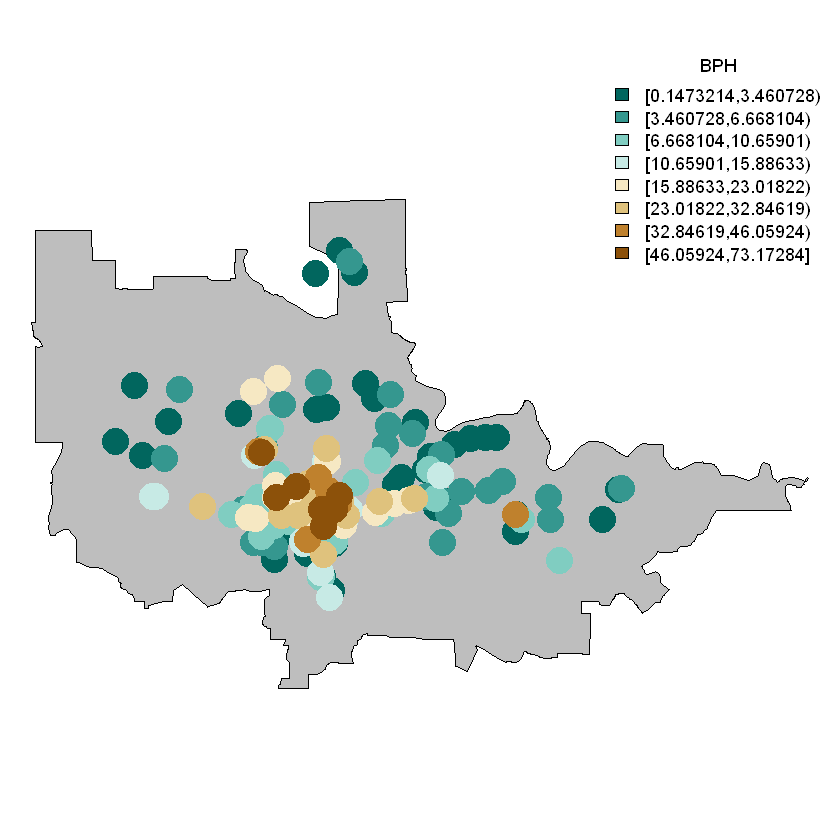

In [42]:
mapping(outspdf$BPH, outspdf)

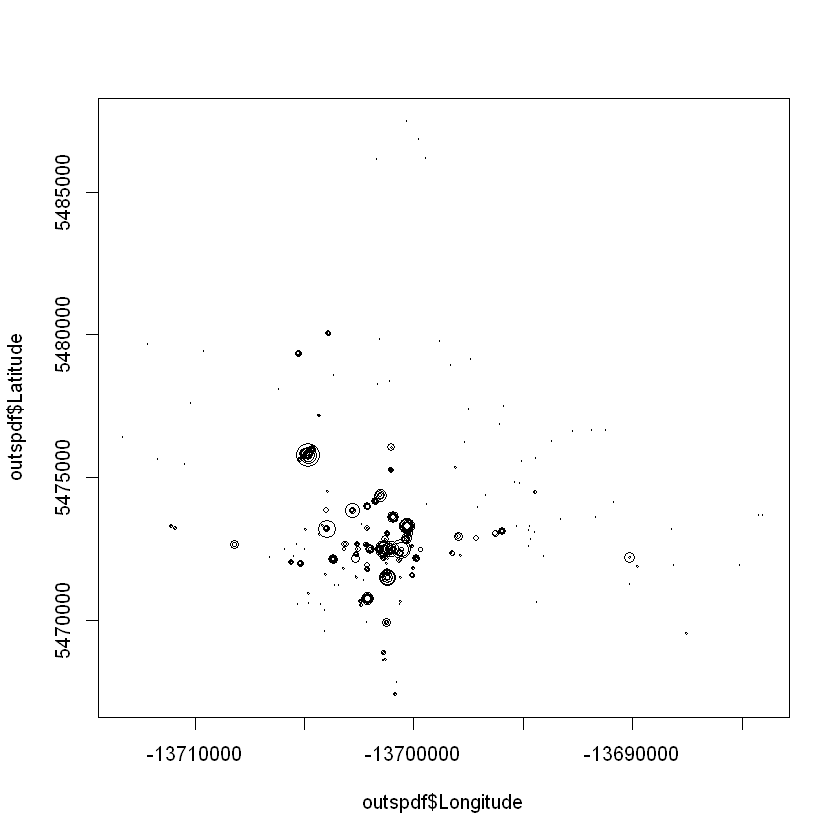

In [43]:
plot(outspdf$Longitude, outspdf$Latitude, type="n")
symbols(outspdf$Longitude, outspdf$Latitude, outspdf$BPH, inches=0.1, add=T)

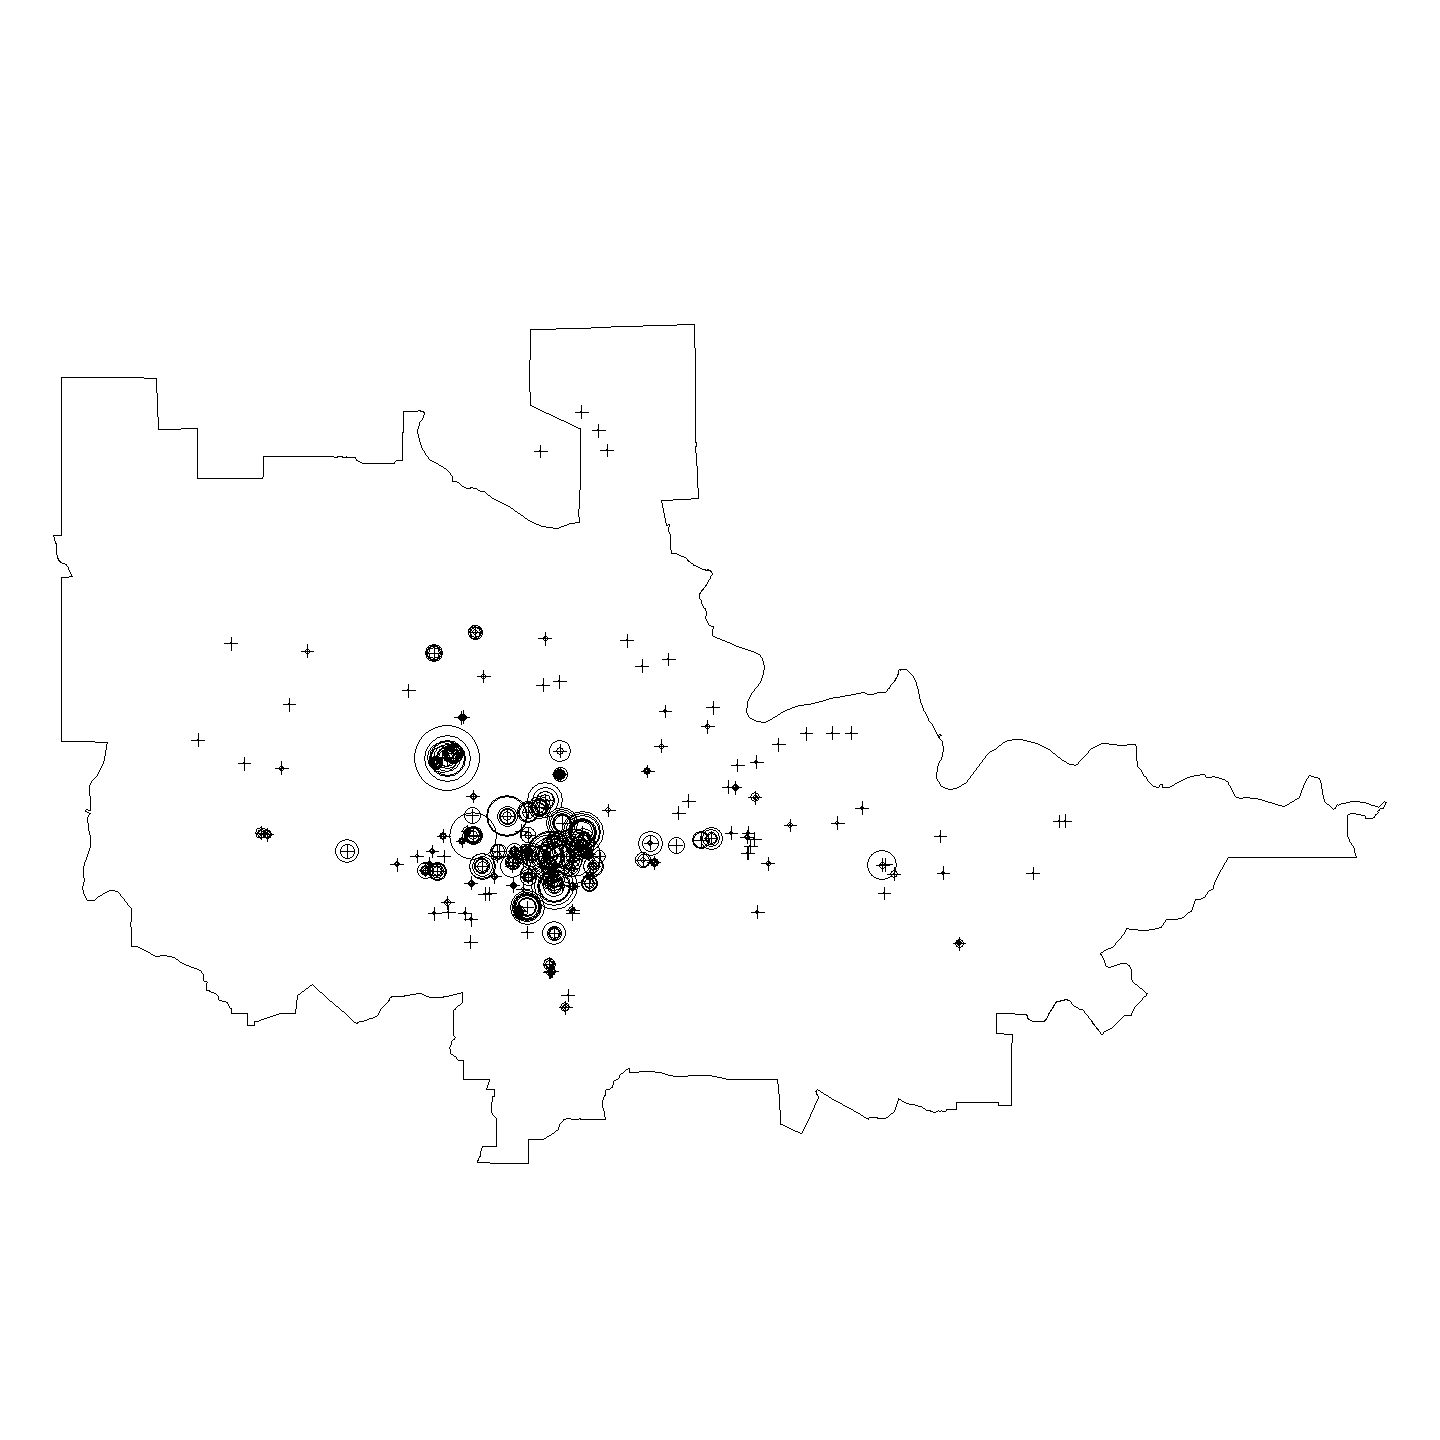

In [44]:
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow=c(1,1),mar=c(0,0,2,0))
plot(MPOBound)
plot(outspdf, add=TRUE)
points(outspdf$Longitude, outspdf$Latitude, cex=outspdf$BPH/10)

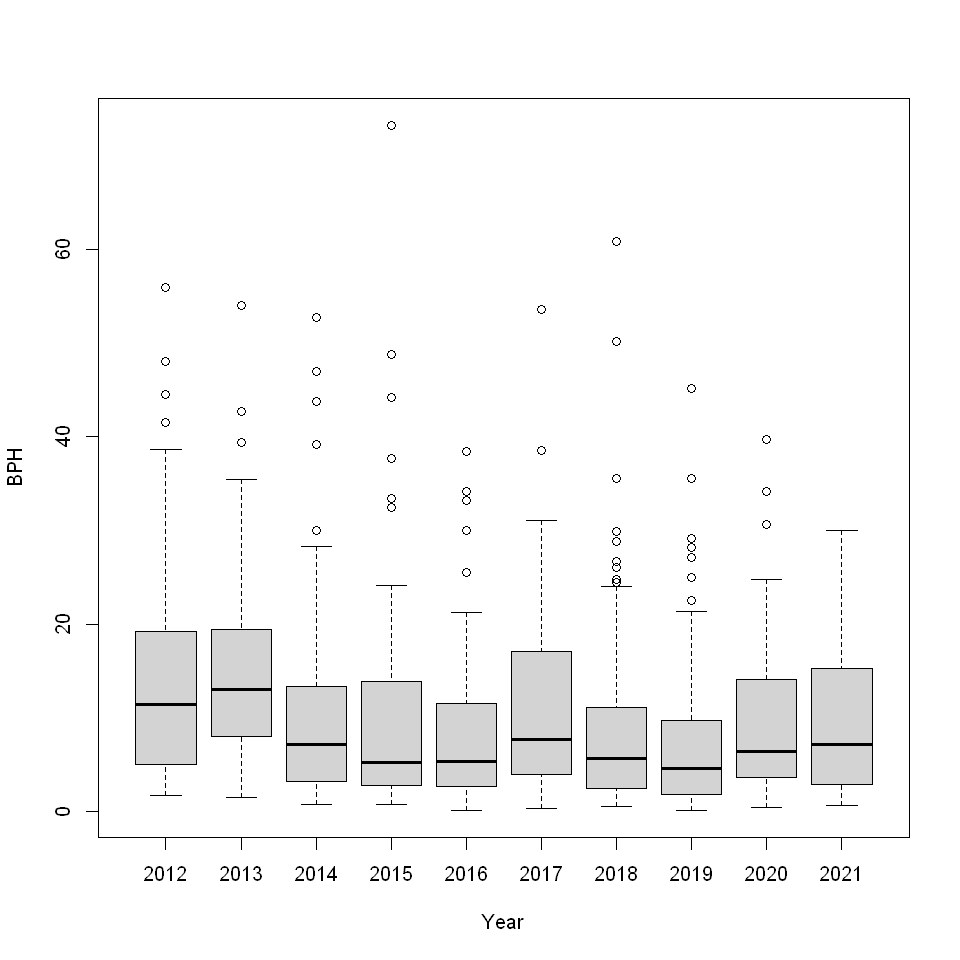

In [45]:
options(repr.plot.width=8, repr.plot.height=8)
boxplot(BPH~Year,data=outdata)

In [43]:
#outdata$Growth <- with(outdata[,c('Location', 'Year', 'BPH')], ave(BPH, Location, 
#                      FUN=function(x) c(NA, diff(x)/x[-length(x)]) ))

In [46]:
for(loc in unique(outdata$Location)){
    years <- sort(unique(outdata[outdata$Location == loc,"Year"]))
    for(yr in years){
        if(yr==min(years)){
            outdata[outdata$Location==loc & outdata$Year==yr,"Growth"] <- NA
        }else{
            i <- which(years==yr)
            x1 <- outdata[outdata$Location==loc & outdata$Year==yr,"BPH"]
            x2 <- outdata[outdata$Location==loc & outdata$Year==years[i-1],"BPH"]
            n <- yr - years[i-1]
            outdata[outdata$Location==loc & outdata$Year==yr,"Growth"] <- (x1-x2)/(n*x2)
        }
    }
}

In [47]:
head(outdata)

,Location,Year,BPH,Latitude,Longitude,Site_Name,DoubleCountLocation,IsOneway,OnewayDirection,IsSidewalk,Growth
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<dbl>
1,10thWestJackson,2013,8.436441,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE,NA
2,10thWestJackson,2014,6.298913,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE,-0.25336842
3,10thWestJackson,2015,5.326087,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE,-0.15444349
4,10thWestJackson,2016,4.207756,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE,-0.20997230
5,11thWestAlder,2012,6.512500,44.04771,-123.0809,11th Ave West of Alder St,TRUE,FALSE,<Null>,FALSE,NA
6,11thWestAlder,2015,8.404494,44.04771,-123.0809,11th Ave West of Alder St,TRUE,FALSE,<Null>,FALSE,0.09683912


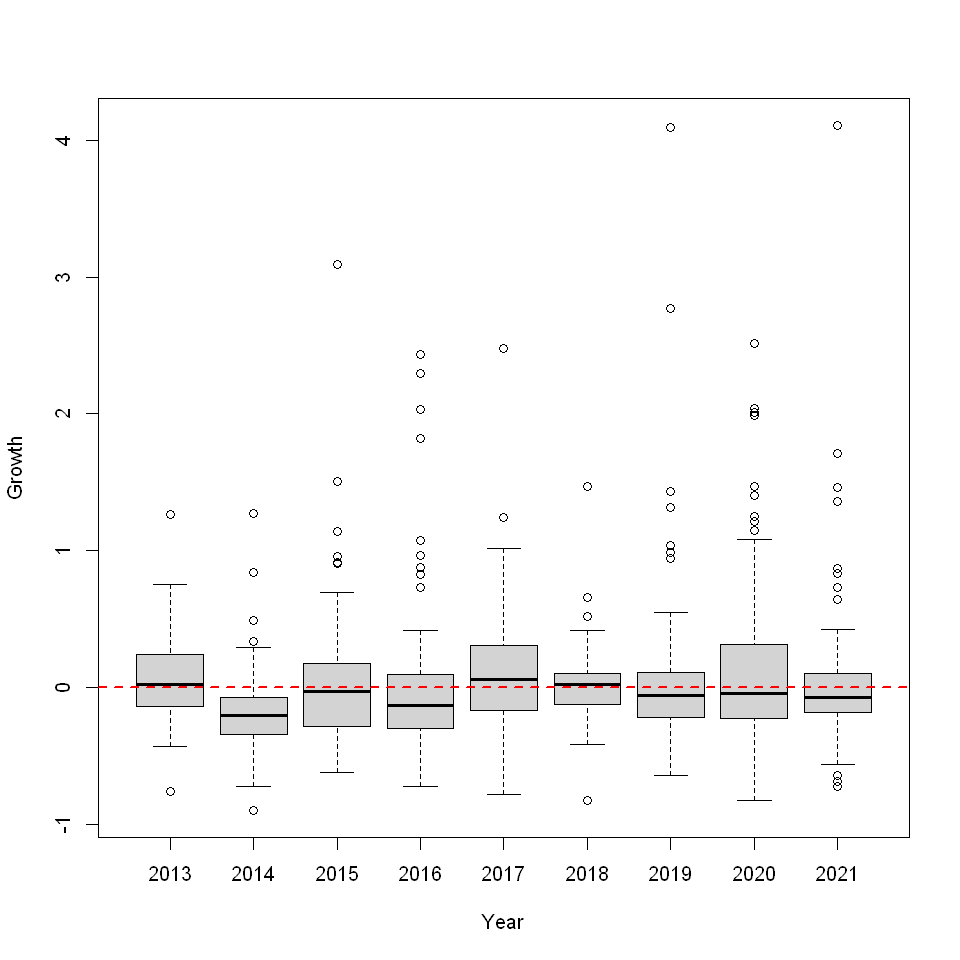

In [48]:
boxplot(Growth~Year,data=outdata)
abline(h=0, col='red', lwd=2, lty=2)

In [49]:
# MPO-wide growth in BPH
df <- transform(aggregate(x=list(BPH = data1$Hourly_Count), by=list(Year = data1$Year), FUN=mean), Growth=ave(BPH, 
                         FUN=function(x) c(NA, diff(x)/x[-length(x)])))
df                                                                                                              

Year,BPH,Growth
<int>,<dbl>,<dbl>
2012,16.486134,NA
2013,13.908181,-0.15637103
2014,11.763774,-0.15418308
2015,11.221044,-0.04613575
2016,8.914303,-0.20557278
2017,9.951249,0.11632389
2018,13.373929,0.34394475
2019,11.770151,-0.11991820
2020,12.289724,0.04414324


In [50]:
data2 <- merge(data1[,c('Location', 'Year', 'Hourly_Count')], locdata[,locvars], by='Location')

In [51]:
head(data2)

,Location,Year,Hourly_Count,Latitude,Longitude,Site_Name,DoubleCountLocation,IsOneway,OnewayDirection,IsSidewalk
,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>,<lgl>
1,10thWestJackson,2013,5,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE
2,10thWestJackson,2013,2,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE
3,10thWestJackson,2013,5,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE
4,10thWestJackson,2013,3,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE
5,10thWestJackson,2013,1,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE
6,10thWestJackson,2013,2,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE


In [52]:
data3 <- data2[data2$IsSidewalk,]

In [53]:
# MPO-wide growth in sidewalk riding BPH
df1 <- transform(aggregate(x=list(BPH = data3$Hourly_Count), by=list(Year = data3$Year), FUN=mean), Growth=ave(BPH, 
                         FUN=function(x) c(NA, diff(x)/x[-length(x)]))) #FUN=function(x) c(NA,exp(diff(log(x)))-1)

In [54]:
df1

Year,BPH,Growth
<int>,<dbl>,<dbl>
2014,4.0841984,NA
2015,2.5757705,-0.36933266
2016,2.4359862,-0.05426896
2017,0.9966799,-0.59085156
2018,2.5343960,1.54283833
2019,1.4058400,-0.44529582
2021,0.7954545,-0.43417848


In [55]:
write.csv(outdata, "T:/DCProjects/StoryMap/BikeCounting/BikeCounts/Output/BPH.csv", row.names = FALSE)

In [56]:
writeOGR(outspdf, dsn="T:/DCProjects/StoryMap/BikeCounting/BikeCounts/Output", layer="BPH_by_Year", 
         driver="ESRI Shapefile", overwrite_layer=TRUE)

In [57]:
bph <- read.csv("T:/DCProjects/StoryMap/BikeCounting/BikeCounts/Output/BPH.csv")

In [58]:
head(bph)

,Location,Year,BPH,Latitude,Longitude,Site_Name,DoubleCountLocation,IsOneway,OnewayDirection,IsSidewalk,Growth
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<dbl>
1,10thWestJackson,2013,8.436441,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE,NA
2,10thWestJackson,2014,6.298913,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE,-0.25336842
3,10thWestJackson,2015,5.326087,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE,-0.15444349
4,10thWestJackson,2016,4.207756,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE,-0.20997230
5,11thWestAlder,2012,6.512500,44.04771,-123.0809,11th Ave West of Alder St,TRUE,FALSE,<Null>,FALSE,NA
6,11thWestAlder,2015,8.404494,44.04771,-123.0809,11th Ave West of Alder St,TRUE,FALSE,<Null>,FALSE,0.09683912


In [59]:
aggdata <- aggregate(x=list(BPH = bph$BPH), by=list(Location = bph$Location), FUN=mean)

In [60]:
aggdata <- merge(aggdata, unique(bph[locvars]), by = 'Location')

In [61]:
aggyear <- aggregate(x=list(Years = bph$Year), by=list(Location = bph$Location), FUN=function(x) length(x))

In [62]:
aggdata <- merge(aggdata, aggyear, by = 'Location')

In [63]:
head(aggdata)

,Location,BPH,Latitude,Longitude,Site_Name,DoubleCountLocation,IsOneway,OnewayDirection,IsSidewalk,Years
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<int>
1,10thWestJackson,6.067299,44.04882,-123.1081,10th Ave West of Jackson St,FALSE,FALSE,<Null>,FALSE,4
2,11thWestAlder,16.201482,44.04771,-123.0809,11th Ave West of Alder St,TRUE,FALSE,<Null>,FALSE,4
3,11thWestAlderSouthSidewalk,2.208680,44.04771,-123.0807,11th Ave South Sidewalk West of Alder St,FALSE,FALSE,<Null>,TRUE,3
4,12thAvePathEastWillamette,10.154583,44.04657,-123.0922,12th Ave Path East of Willamette St,FALSE,FALSE,<Null>,FALSE,8
5,12thEastChambers,5.844584,44.04663,-123.1172,12th Ave East of Chambers St,FALSE,FALSE,<Null>,FALSE,4
6,12thEastLawrence,16.829167,44.04661,-123.0976,12th Ave West of Lincoln St,FALSE,FALSE,<Null>,FALSE,1


In [64]:
names(aggdata)[which(names(aggdata) %in% c('DoubleCountLocation', 'OnewayDirection'))] <- c('DoubleCNT', 'OnewayDIR')

In [65]:
aggspdf <- df2spdf(aggdata, 'Longitude', 'Latitude')

In [66]:
writeOGR(aggspdf, dsn="T:/DCProjects/StoryMap/BikeCounting/BikeCounts/Output", layer="BPH", 
         driver="ESRI Shapefile", overwrite_layer=TRUE)